In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier

In [2]:
credit_df = pd.read_csv('credit.csv')

In [3]:
credit_df.shape

(1000, 17)

In [4]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: 
    if credit_df[feature].dtype == 'object': 
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [7]:
# capture the target column ("default") into separate vectors for training set and test set

X = credit_df.drop("default" , axis=1)

y = credit_df.pop("default")




In [8]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [9]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [10]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [11]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [12]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.142979
months_loan_duration  0.114442
credit_history        0.058895
purpose               0.056284
amount                0.163313
savings_balance       0.079297
employment_duration   0.089860
percent_of_income     0.034096
years_at_residence    0.046145
age                   0.124335
other_credit          0.012842
housing               0.016386
existing_loans_count  0.012179
job                   0.023460
dependents            0.017836
phone                 0.007652


In [13]:
y_predict = dt_model.predict(X_test)

#                                      Regularising the Decision Tree

In [14]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [15]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.142979
months_loan_duration  0.114442
credit_history        0.058895
purpose               0.056284
amount                0.163313
savings_balance       0.079297
employment_duration   0.089860
percent_of_income     0.034096
years_at_residence    0.046145
age                   0.124335
other_credit          0.012842
housing               0.016386
existing_loans_count  0.012179
job                   0.023460
dependents            0.017836
phone                 0.007652


In [16]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

AUC: 0.851


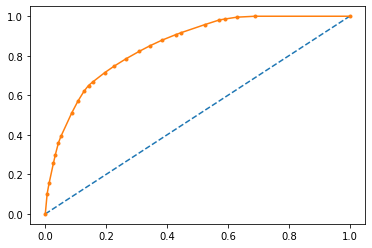

In [18]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.726


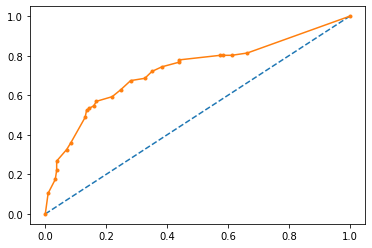

In [19]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       486
           1       0.68      0.62      0.65       214

    accuracy                           0.80       700
   macro avg       0.76      0.75      0.75       700
weighted avg       0.79      0.80      0.79       700



In [22]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [23]:
confusion_matrix(train_labels, ytrain_predict)

array([[424,  62],
       [ 81, 133]], dtype=int64)

In [24]:
confusion_matrix(test_labels, ytest_predict)

array([[183,  31],
       [ 40,  46]], dtype=int64)

In [25]:
reg_dt_model.score(X_train,train_labels)

0.7957142857142857

In [1]:
reg_dt_model.score(X_test,test_labels) * 100

NameError: name 'reg_dt_model' is not defined

**HappY LeaRniNG**